In [28]:
import w_risk_kit as wrk
import pandas as pd

import yfinance as yf

In [174]:
securityId = yf.Ticker('AAPL')
securityShortName = securityId.get_info()['shortName']

In [175]:
securityPrices = pd.DataFrame(securityId.history(start='1990-12-31', end='2022-12-31')['Close'].rename(securityShortName))
securityPrices

,Apple Inc.
Date,
1990-12-31,0.311369
1991-01-02,0.314989
1991-01-03,0.311369
1991-01-04,0.313179
1991-01-07,0.313179
...,...
2022-01-19,166.229996
2022-01-20,164.509995
2022-01-21,162.410004


In [176]:
securityDailyReturns = securityPrices.pct_change().dropna()
securityMonthlyReturns = (securityDailyReturns+1).groupby(pd.Grouper(freq='M')).prod()-1

In [177]:
wrk.std_distr_analysis(securityMonthlyReturns,252,0.02)

,Apple Inc.
Annualized Return,66.772188
Annualized Volatility,1.955775
Skewness,-0.257791
Kurtosis,4.751717
Is Normal,False
Sharpe Ratio,33.467015
Gaussian VaR (95%),0.177661
Cornish-Fisher VaR (95%),0.182174
Monthly Historic VaR (95%),0.159482
Monthly Historic CVaR (95%),0.252929


<AxesSubplot:xlabel='Date'>

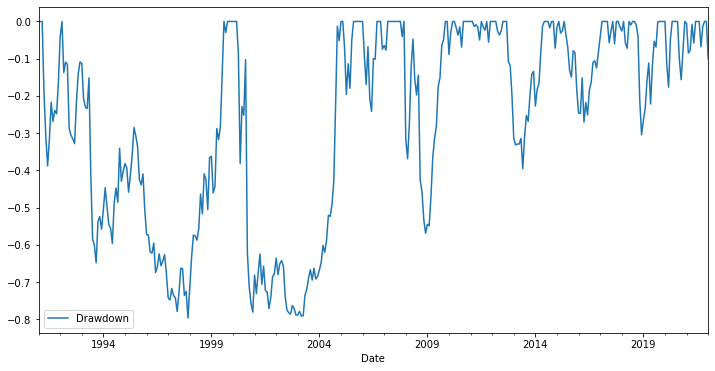

In [178]:
wrk.drawdown(securityMonthlyReturns[securityShortName])[['Drawdown']].plot(figsize=(12,6))